<a href="https://colab.research.google.com/github/albinspaul/FDP-on-DL/blob/main/DL_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
os.chdir('/content/drive/MyDrive/FDP on DL')

In [3]:
pwd

'/content/drive/MyDrive/FDP on DL'

DNN for classification problem

1 Input layer
2 Hidden layer
1 output layer

In [4]:
import tensorflow as tf

In [5]:
mnist_data=tf.keras.datasets.mnist

In [72]:
(x_train,y_train),(x_test,y_test)=mnist_data.load_data()

In [11]:
import matplotlib.pyplot as plt

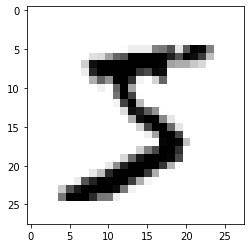

In [14]:
plt.imshow(x_train[0],cmap='binary')

In [13]:
y_train[0]

5

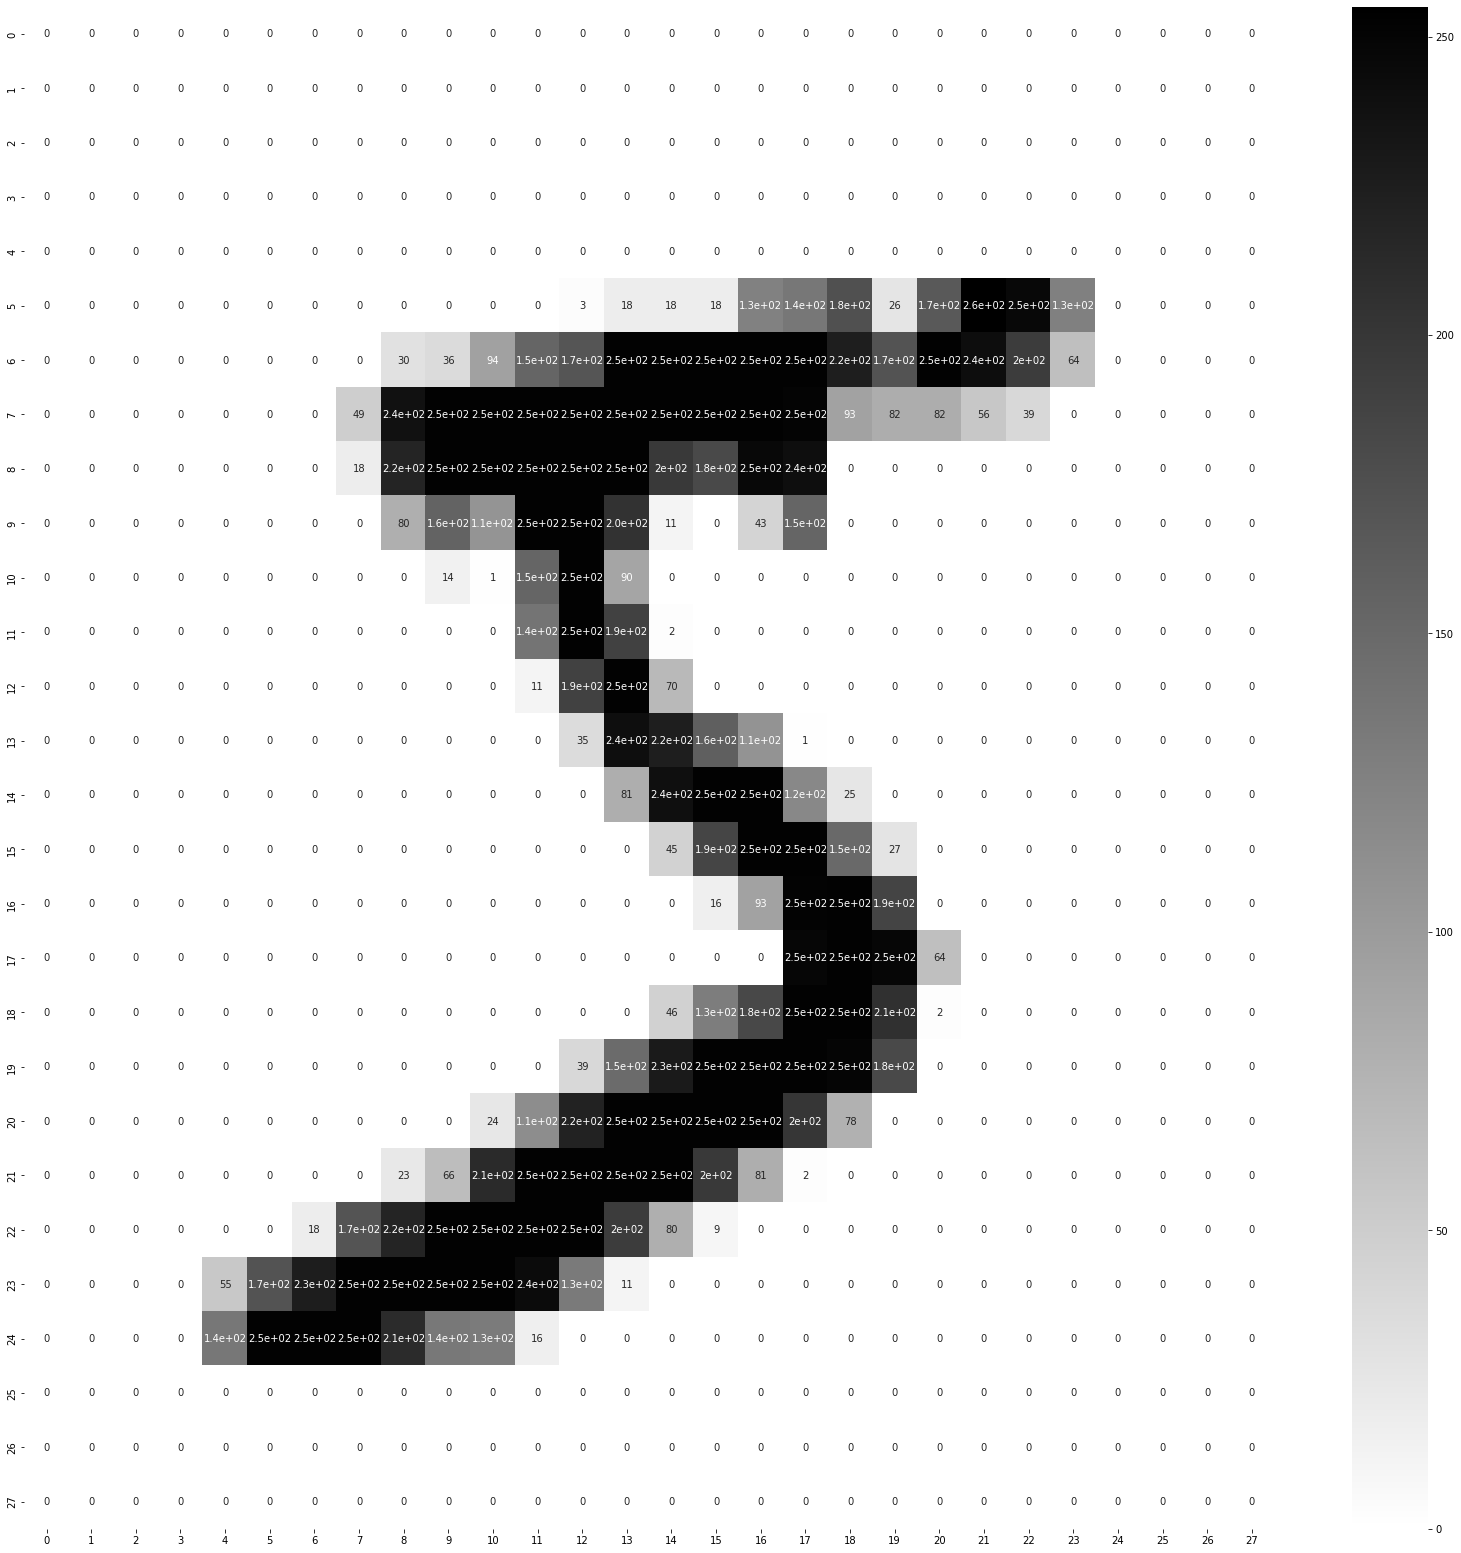

In [22]:
import seaborn as sns
plt.figure(figsize=[28,28])
sns.heatmap(x_train[0],annot=True,cmap='binary')

In [61]:
x_train=x_train/255
x_test=x_test/255

In [73]:
x_valid,x_train=x_train[:5000],x_train[5000:]
y_valid,y_train=y_train[:5000],y_train[5000:]

In [35]:
layers=[tf.keras.layers.Flatten(input_shape=[28,28], name='inputlayer'),
        tf.keras.layers.Dense(300,activation='relu', name='hiddenlayer1'),
        tf.keras.layers.Dense(100,activation='relu', name='hiddenlayer2'),
        tf.keras.layers.Dense(10,activation='softmax', name='outputlayer')]

In [39]:
model1=tf.keras.models.Sequential(layers)

In [40]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Hyper Parameters

In [42]:
loss_function='sparse_categorical_crossentropy'
Optimiser='adam'
Metrics=['accuracy']

Compile Model

In [45]:
model1.compile(loss=loss_function,optimizer=Optimiser,metrics=Metrics)

In [46]:
model1.layers

In [48]:
model1.layers[0].name

'inputlayer'

In [49]:
hidden1=model1.layers[1]

In [65]:
w,h=hidden1.get_weights()

In [54]:
w

array([[-0.04575352,  0.00014386, -0.03009427, ..., -0.06676108,
        -0.06480528, -0.0069245 ],
       [-0.05777302,  0.02555548,  0.0411269 , ...,  0.05992293,
        -0.01226049,  0.01999187],
       [-0.04063299,  0.03880138,  0.04852609, ..., -0.05703852,
         0.02913794, -0.03199905],
       ...,
       [ 0.02833113, -0.04209402,  0.06177507, ...,  0.02081097,
        -0.06426731,  0.03756138],
       [ 0.02149078, -0.02096432,  0.00794408, ..., -0.00062024,
         0.055231  ,  0.0023707 ],
       [-0.03041863, -0.07040227,  0.03775775, ..., -0.0392543 ,
         0.03919519,  0.04087678]], dtype=float32)

In [63]:
epoch=5
validation_set=(x_valid,y_valid)

In [71]:
x_train

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [74]:
history=model1.fit(x_train,y_train,epochs=epoch,validation_data=validation_set)

Epoch 1/5
1719/1719 [==============================] - 7s 3ms/step - loss: 1.3657 - accuracy: 0.8679 - val_loss: 2.2251 - val_accuracy: 0.2928
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2752 - accuracy: 0.9276 - val_loss: 2.2437 - val_accuracy: 0.2256
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1856 - accuracy: 0.9488 - val_loss: 2.2440 - val_accuracy: 0.1626
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1543 - accuracy: 0.9582 - val_loss: 2.2510 - val_accuracy: 0.1258
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1304 - accuracy: 0.9643 - val_loss: 2.2710 - val_accuracy: 0.1690


In [77]:
prediction=model1.predict(x_test[0])

1/1 [==============================] - 0s 53ms/step


In [78]:
prediction

array([[1.0774206e-18, 5.1558825e-08, 1.6015276e-05, 5.0468370e-06,
        3.5527052e-08, 6.8516182e-10, 1.6531162e-27, 9.9997890e-01,
        9.7259911e-10, 1.1340367e-08]], dtype=float32)

In [80]:
y_test[0]

7

In [81]:
import numpy as np

In [82]:
np.argmax(prediction)

7